In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from mm_analytics.objects import TEAM_NAMES, NpEncoder
# Load Feature File
df = pd.read_csv("../TeamSeasons.csv")

In [36]:
resume_cols = ["Q1_WinPct", "Q2_WinPct", "Q3_WinPct", "Q4_WinPct", "SOS", "SOV", "NET_last"]
resume_df = df[resume_cols]
resume_df.fillna(0, inplace=True)
stat_cols = ["AdjOE_mean", "AdjDE_mean", "Poss_mean", "FGA3_mean", "FTA_mean", "FG%_mean","FG3%_mean","FT%_mean","Ast_mean","TO_mean","OR_mean", "OppFGA3_mean", "OppFTA_mean", "OppFG%_mean","OppFG3%_mean","OppFT%_mean","OppAst_mean","OppTO_mean","OppOR_mean"]
stat_df = df[stat_cols]

/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_2668/898261421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df.fillna(0, inplace=True)


In [12]:
resume_scaler = MinMaxScaler()
t_resume_df = resume_scaler.fit_transform(resume_df)
resume_similarity = cosine_similarity(t_resume_df)

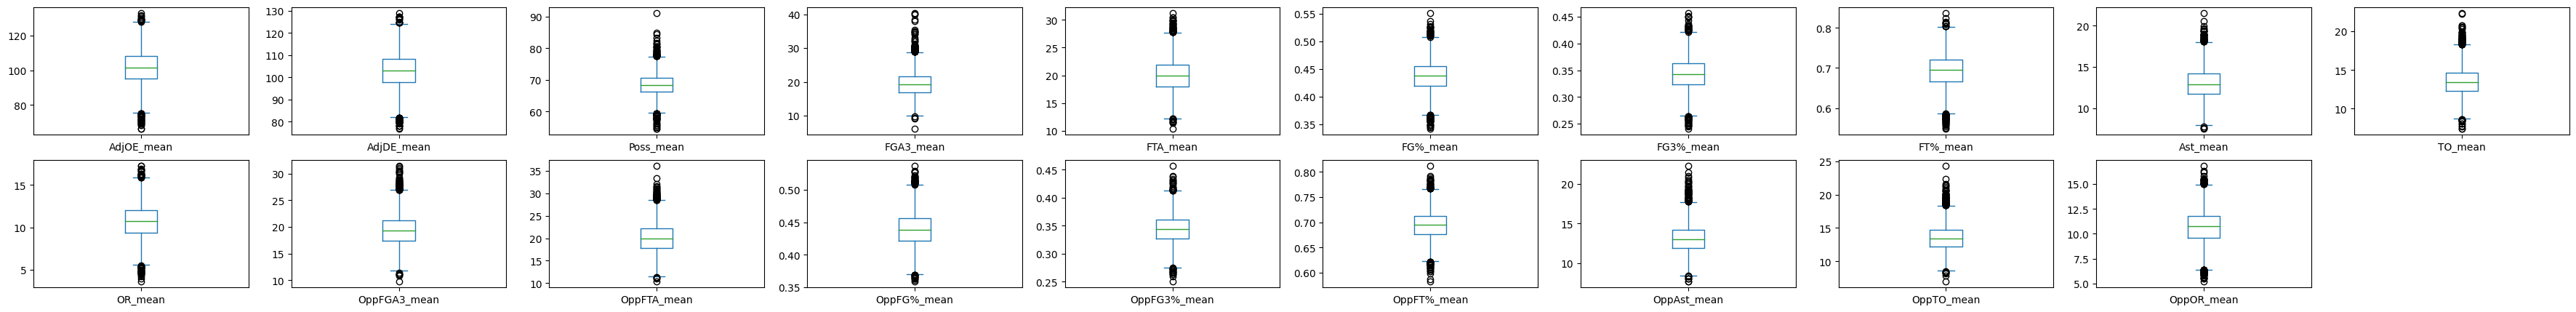

In [48]:
# Set fig size
stat_df.plot(kind='box', subplots=True, layout=(2,10), sharex=False, sharey=False, figsize=(45,5))
plt.show()


In [13]:
stat_scaler = MinMaxScaler()
t_stat_df = stat_scaler.fit_transform(stat_df)
stat_similarity = cosine_similarity(t_stat_df)

In [55]:
avg_similarity = (resume_similarity + stat_similarity) / 2

In [56]:
avg_similarity

array([[1.        , 0.84328268, 0.89410687, ..., 0.90758321, 0.88736672,
        0.8378119 ],
       [0.84328268, 1.        , 0.88412765, ..., 0.85003071, 0.82989018,
        0.7809019 ],
       [0.89410687, 0.88412765, 1.        , ..., 0.87577017, 0.80649286,
        0.70969095],
       ...,
       [0.90758321, 0.85003071, 0.87577017, ..., 1.        , 0.95330594,
        0.91759302],
       [0.88736672, 0.82989018, 0.80649286, ..., 0.95330594, 1.        ,
        0.9501308 ],
       [0.8378119 , 0.7809019 , 0.70969095, ..., 0.91759302, 0.9501308 ,
        1.        ]])

In [51]:
print([(min(v), max(v)) for v in t_stat_df])
print(f"Min: {min([min(s) for s in stat_similarity])}")
print(f"Max: {max([max(s) for s in stat_similarity])}")

[(0.015990891429422005, 0.6900790937017809), (0.29237378337538517, 0.7439873552907001), (0.2651128466883954, 0.7308007230144138), (0.19778713593229047, 0.7544193829775871), (0.14639501461781879, 0.6460695826583351), (0.15304003954522982, 0.7602882807603927), (0.22470170089215724, 0.7410742462813742), (0.1950307448293418, 0.6782386829281288), (0.3415344878969502, 0.760322952710496), (0.14838810575661032, 0.8481167637380462), (0.19049506623301937, 0.7610229487332458), (0.2850771456123433, 0.6297255222848261), (0.047984853067998046, 0.8506552094522022), (0.1499647567400446, 0.8011903474485933), (0.2651572367469589, 0.6585260361235492), (0.11390080738177621, 0.6717006042480136), (0.24149806284976316, 0.6131987938267529), (0.32414980628497625, 0.6551326412918108), (0.2134763741562199, 0.7012544609062399), (0.1876268372178832, 0.6386506126818332), (0.3716561097103497, 0.6712098773935804), (0.24689006750241094, 0.6379906996863849), (0.24344482355762886, 0.6692954608744084), (0.246672344437124

In [25]:
similar_teams = {}
for i in range(len(avg_similarity)):
    avg_similarity[i][i] = 0

    arr = avg_similarity[i]
    # Get the indices of the most similar 3 values
    top_3_indices = arr.argsort()[-3:][::-1]

    # Print the top 3 values and their indices
    cur_team = df.iloc[i]
    similar_teams[(cur_team['TeamID'], cur_team['Season'])] = [
        ((df.iloc[j]['TeamID'], df.iloc[j]['Season']), avg_similarity[i][j]) for j in top_3_indices]

In [64]:
formatted_similar_teams = {}
for (tid, ts), v in similar_teams.items():
    formatted_similar_teams[f"{tid}_{ts}"] = [(stid, sts, round(sv, 3)) for (stid, sts), sv in v]

In [65]:
# Export Similar Teams as JSON
import json
with open('similar_teams.json', 'w') as f:
    json.dump(formatted_similar_teams, f, cls=NpEncoder)